In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'horses_or_humans',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [3]:
get_label_name = metadata.features['label'].int2str

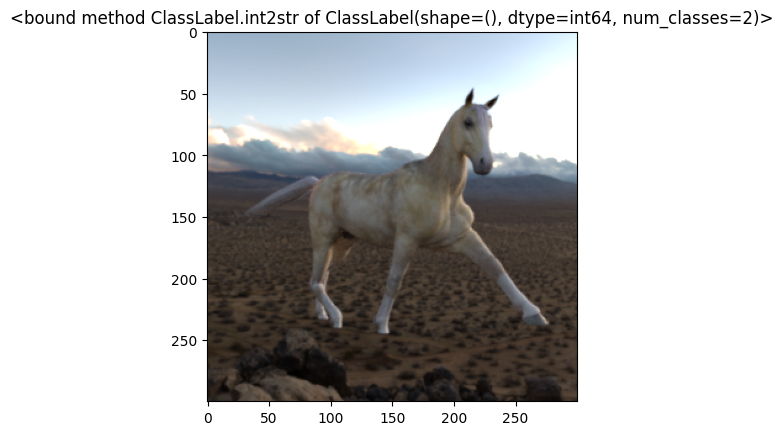

In [4]:
image, label = next(iter(test_ds))
plt.imshow(image)
plt.title(get_label_name)
plt.show()

In [5]:
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original')
    plt.imshow(original)
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.title('Augmented')
    plt.imshow(augmented)
    plt.axis("off")

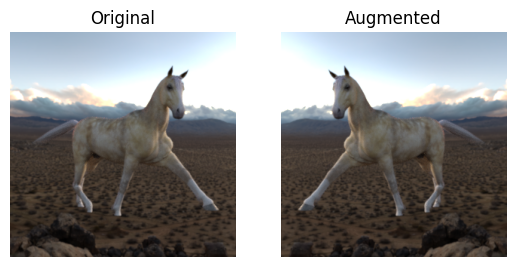

In [6]:
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

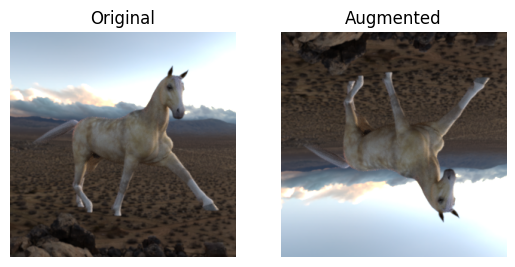

In [7]:
flipped = tf.image.flip_up_down(image)
visualize(image, flipped)

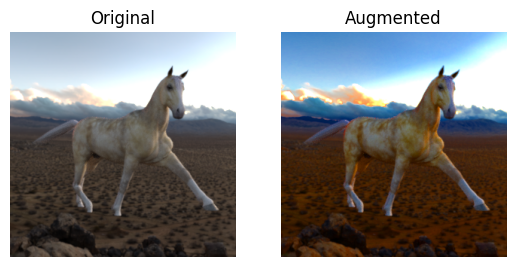

In [8]:
saturation = tf.image.adjust_saturation(image, 3)
visualize(image, saturation)

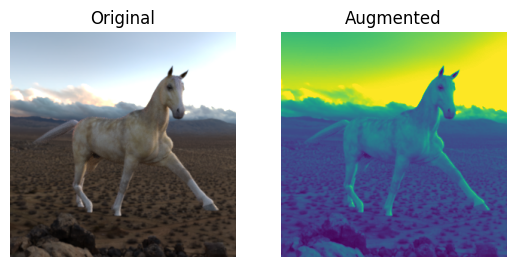

In [9]:
gray = tf.image.rgb_to_grayscale(image)
visualize(image, gray)

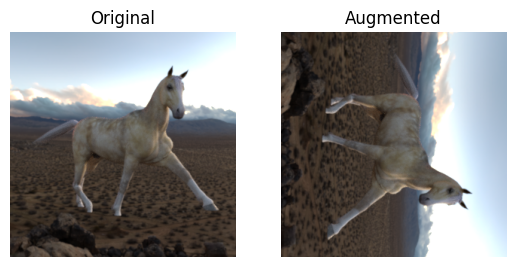

In [10]:
rotated = image
for i in range(3):
  rotated = tf.image.rot90(rotated)
visualize(image, rotated)

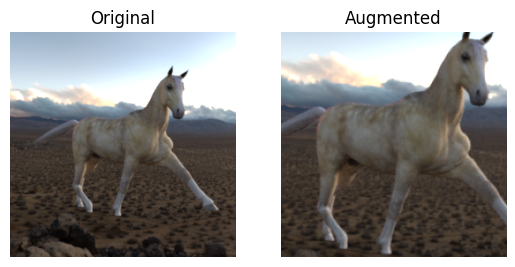

In [11]:
cropp = tf.image.central_crop(image, central_fraction=0.65)
visualize(image, cropp)

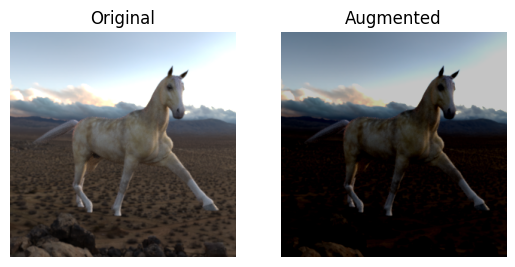

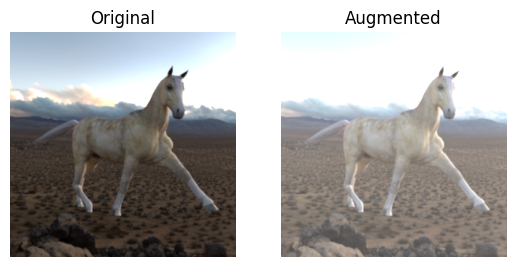

In [12]:
for i in range(2):
  seed = (i, 0)
  random_brightness = tf.image.stateless_random_brightness(image, max_delta=0.4, seed=seed)
  visualize(image, random_brightness)